<a href="https://colab.research.google.com/github/Deepakksingh-GIT/human-voice-classification-clustering/blob/main/Human_Voice_Projectcolabfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Voice Classification & Clustering
####Domain: Speech Processing, Machine Learning

####Goals:

- Classification – Predict the gender (male/female) from voice features

- Clustering – Group similar voices together without labels (speaker-style - clustering)

- Build a Streamlit app for real-time predictions

- Evaluate the model performance


#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
import joblib


In [ ]:
import pandas as pd

df = pd.read_excel("/content/vocal_gender_features_new.csv.xlsx")
df.head()



,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [ ]:
df.isnull().sum()

,0
mean_spectral_centroid,0
std_spectral_centroid,0
mean_spectral_bandwidth,0
std_spectral_bandwidth,0
mean_spectral_contrast,0
mean_spectral_flatness,0
mean_spectral_rolloff,0
zero_crossing_rate,0
rms_energy,0
mean_pitch,0


In [ ]:
df.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [ ]:
# Check missing values
print(df.isnull().sum())

# If missing values exist, drop them (or you can impute)
df = df.dropna()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

#Data Cleaning & Preprocessing

In [ ]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

Duplicate rows: 0


In [ ]:
#Outliers (optional but good practice)

df = df[(np.abs(df - df.mean()) <= (3 * df.std())).all(axis=1)]
print("Dataset shape after removing outliers:", df.shape)

Dataset shape after removing outliers: (11699, 44)


# Split the Dataset (Train, Test, Split)
- Train → 70%
- Validation → 15%
- Test → 15%

In [ ]:
# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]

In [ ]:
# First split: Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

In [ ]:
# Second split: Validation (15%) + Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

In [ ]:
print("Train Set Shape :", X_train.shape)
print("Validation Shape:", X_val.shape)
print("Test Set Shape  :", X_test.shape)

Train Set Shape : (8189, 43)
Validation Shape: (1755, 43)
Test Set Shape  : (1755, 43)


# Normalize Numerical Features
- Normalization is required because:
- MFCC features have different ranges
- Spectral features (centroid, bandwidth) vary widely
- Machine learning algorithms (SVM, KNN) perform better

#Use StandardScaler

In [ ]:
scaler = StandardScaler()

# Fit only on training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Use same scaler for validation & test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import joblib
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

joblib.dump(scaler, "models/scaler.pkl")
print("Scaler saved as models/scaler.pkl")

Scaler saved as models/scaler.pkl


#EDA -Exploratory Data Analysis

In [ ]:
# For visual settings
sns.set(style="whitegrid")

###Target Variable Distribution

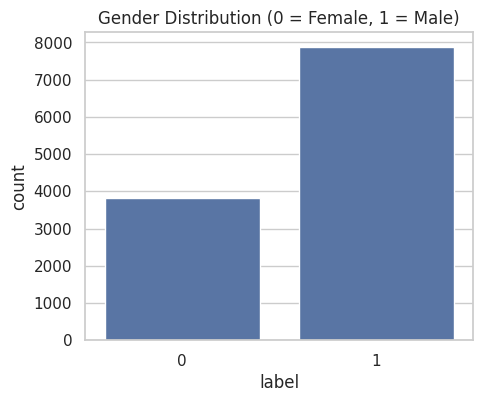

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["label"])
plt.title("Gender Distribution (0 = Female, 1 = Male)")
plt.show()


###Distribution of Key Audio Features

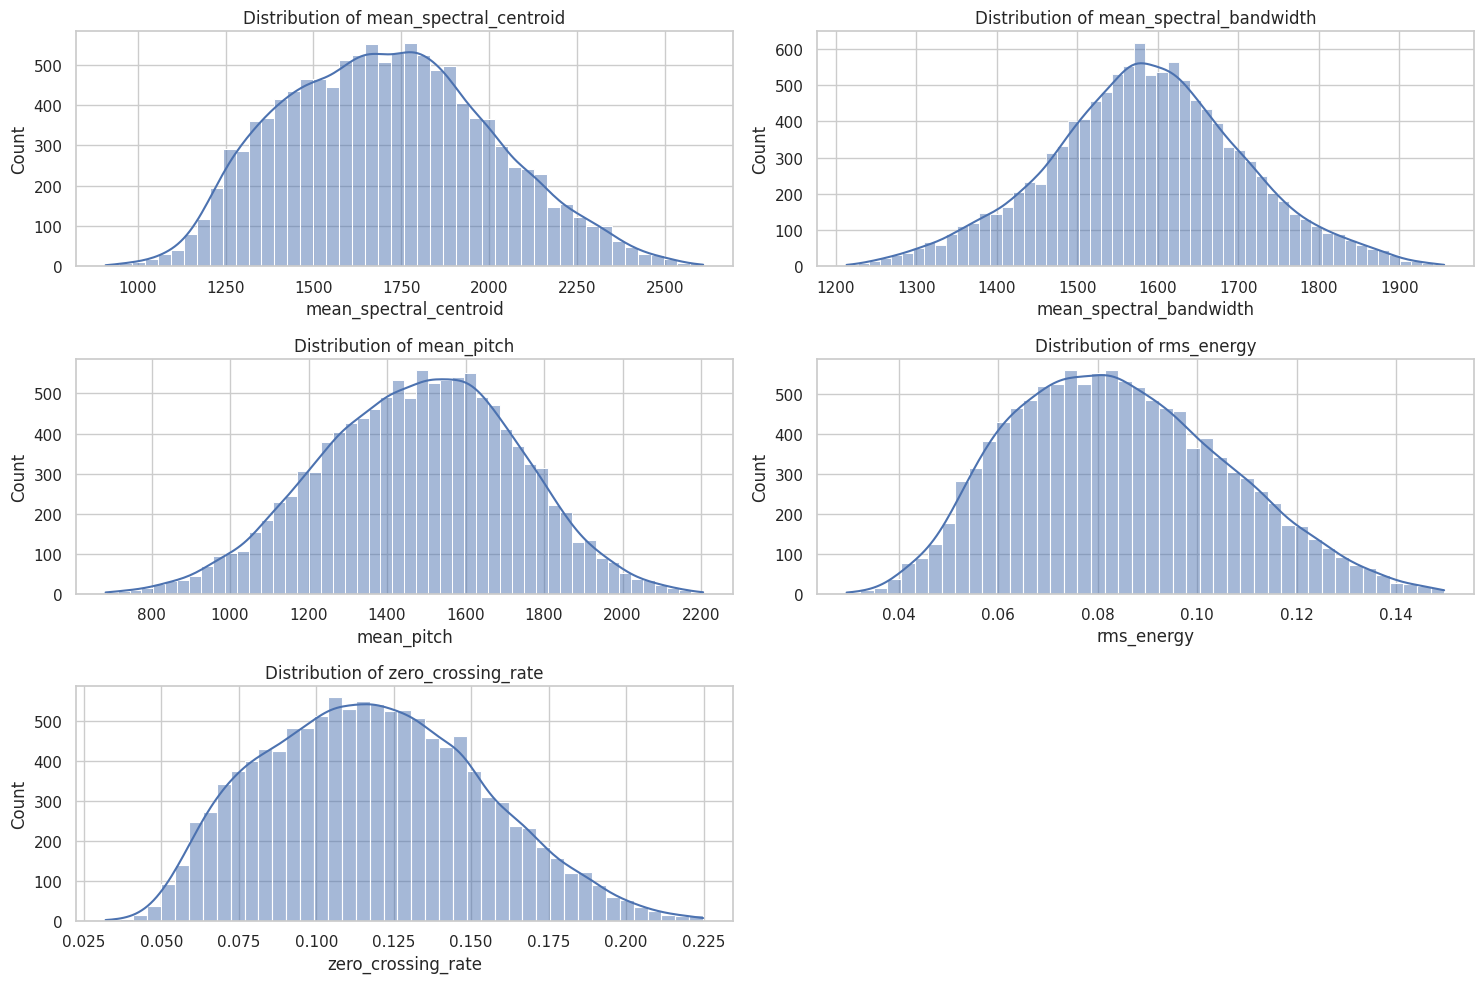

In [ ]:
features = [
    "mean_spectral_centroid",
    "mean_spectral_bandwidth",
    "mean_pitch",
    "rms_energy",
    "zero_crossing_rate"
]

plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


###Boxplots for Gender vs. Key Features

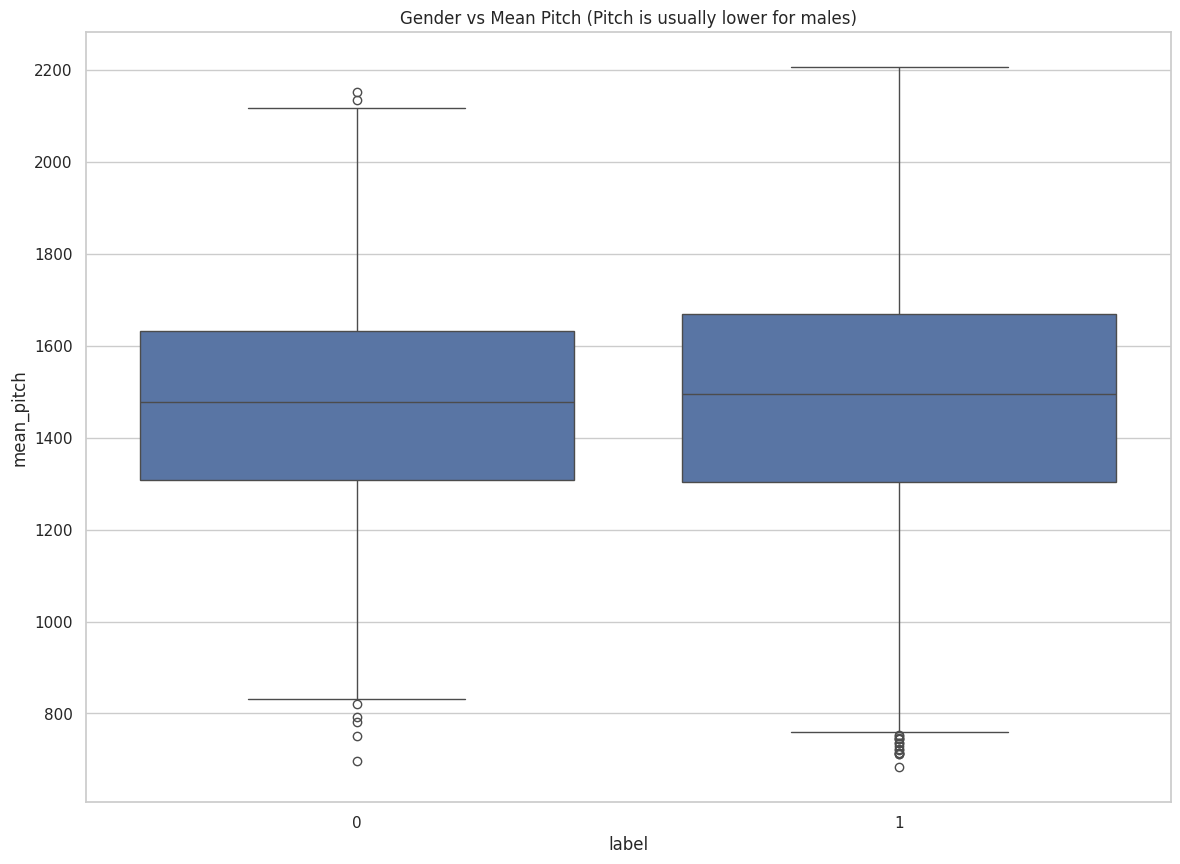

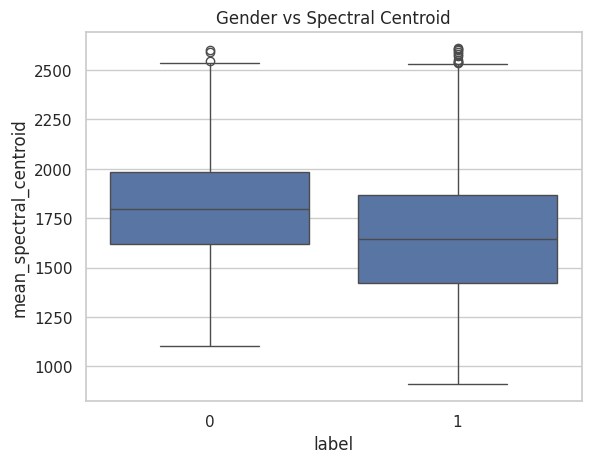

In [ ]:
plt.figure(figsize=(14,10))

sns.boxplot(x="label", y="mean_pitch", data=df)
plt.title("Gender vs Mean Pitch (Pitch is usually lower for males)")
plt.show()

sns.boxplot(x="label", y="mean_spectral_centroid", data=df)
plt.title("Gender vs Spectral Centroid")
plt.show()


###Correlation Heatmap

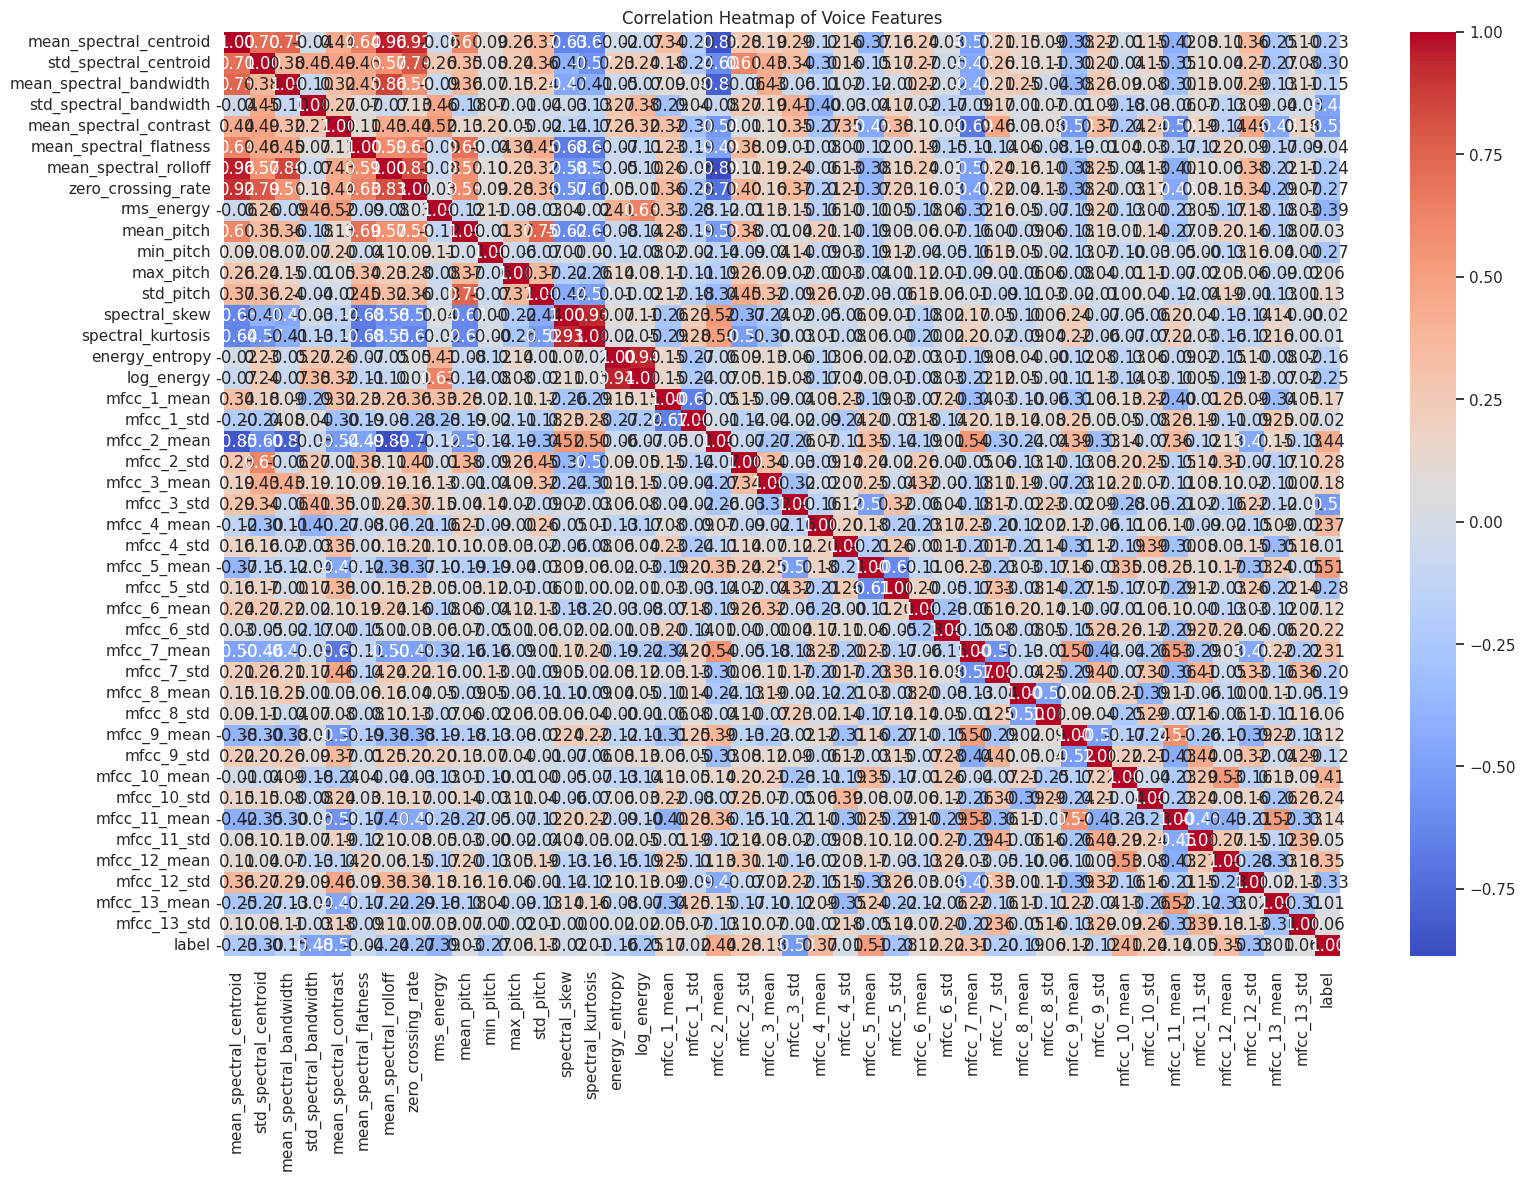

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Voice Features")
plt.show()


###Gender-Based Mean Comparison of Features

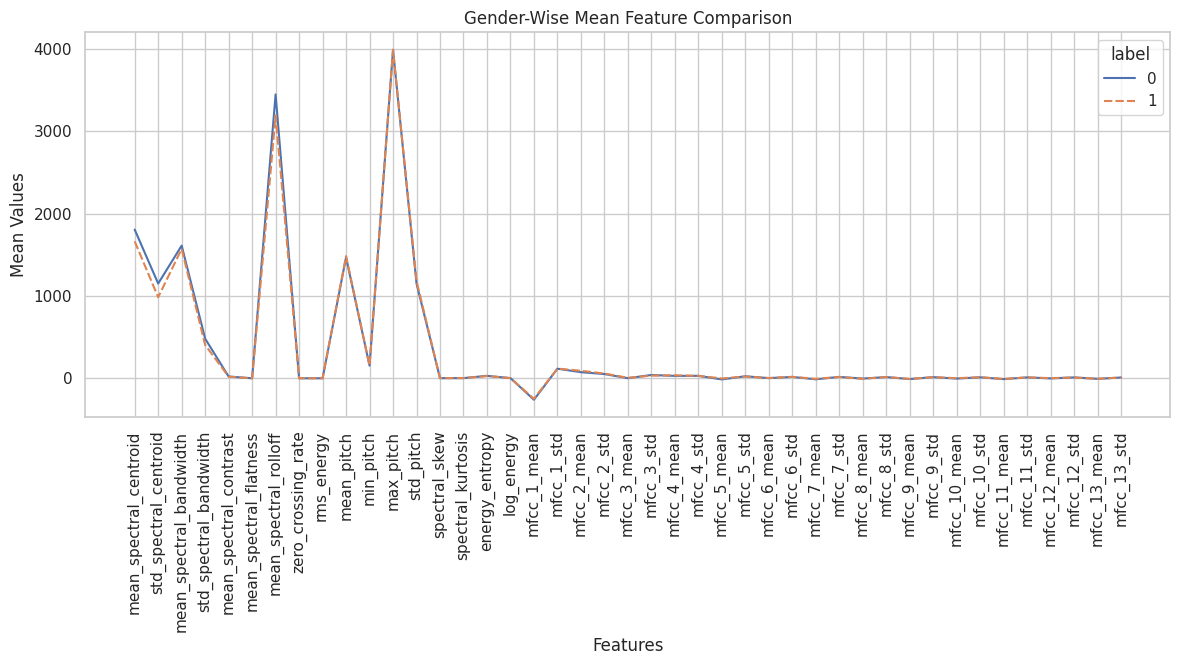

In [ ]:
gender_means = df.groupby("label").mean()

plt.figure(figsize=(14,5))
sns.lineplot(data=gender_means.T)
plt.title("Gender-Wise Mean Feature Comparison")
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.xticks(rotation=90)
plt.show()


###MFCC Feature Distribution (Overview)

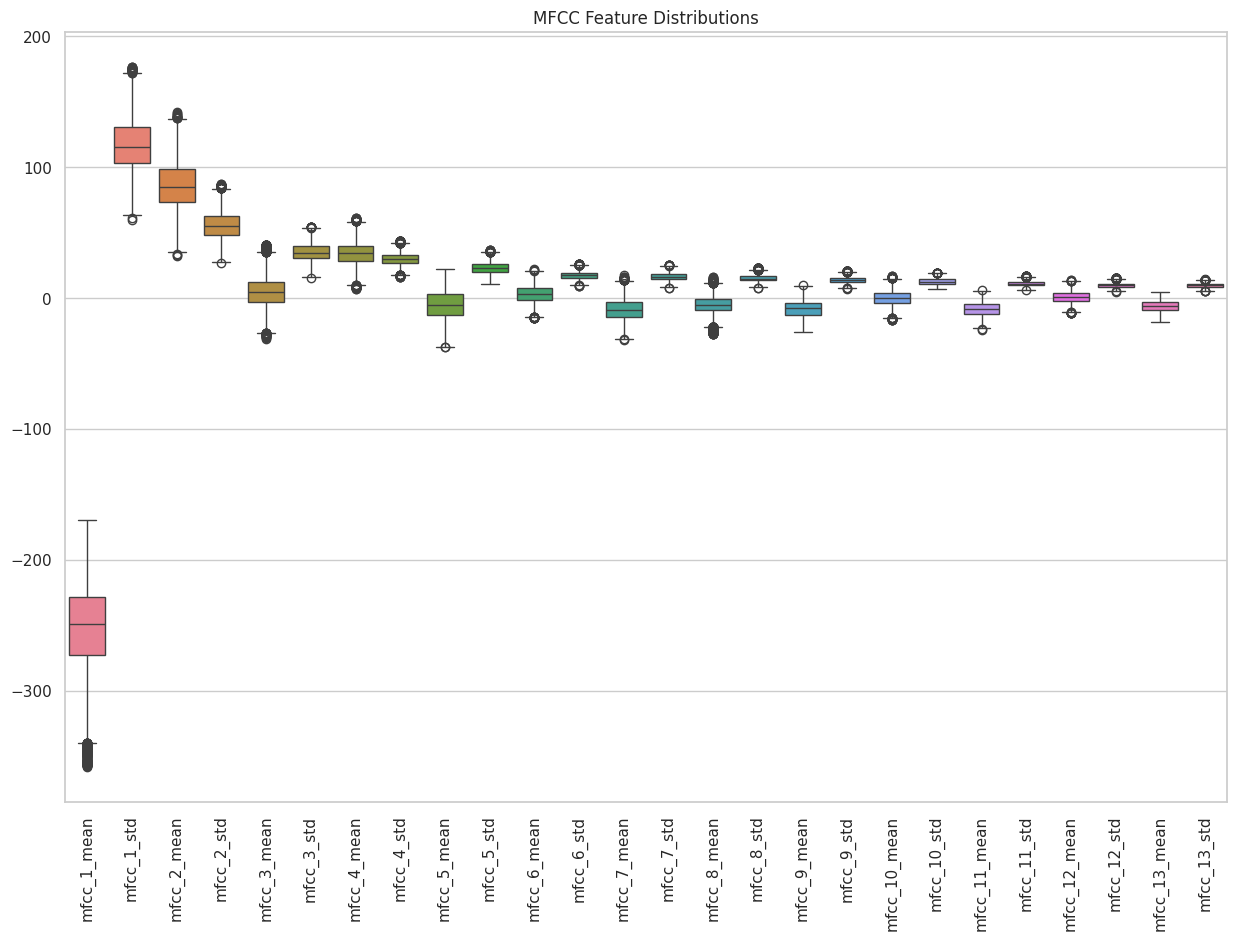

In [ ]:
mfcc_cols = [col for col in df.columns if "mfcc" in col]

plt.figure(figsize=(15,10))
sns.boxplot(data=df[mfcc_cols])
plt.xticks(rotation=90)
plt.title("MFCC Feature Distributions")
plt.show()


###Scatterplot: Pitch vs Spectral Centroid (Colored by Gender)

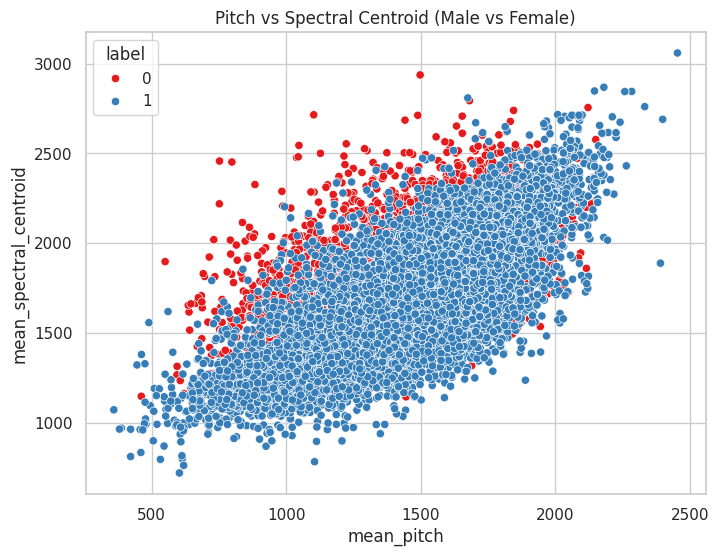

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["mean_pitch"],
    y=df["mean_spectral_centroid"],
    hue=df["label"],
    palette="Set1"
)
plt.title("Pitch vs Spectral Centroid (Male vs Female)")
plt.show()


###Pairplot of Important Features

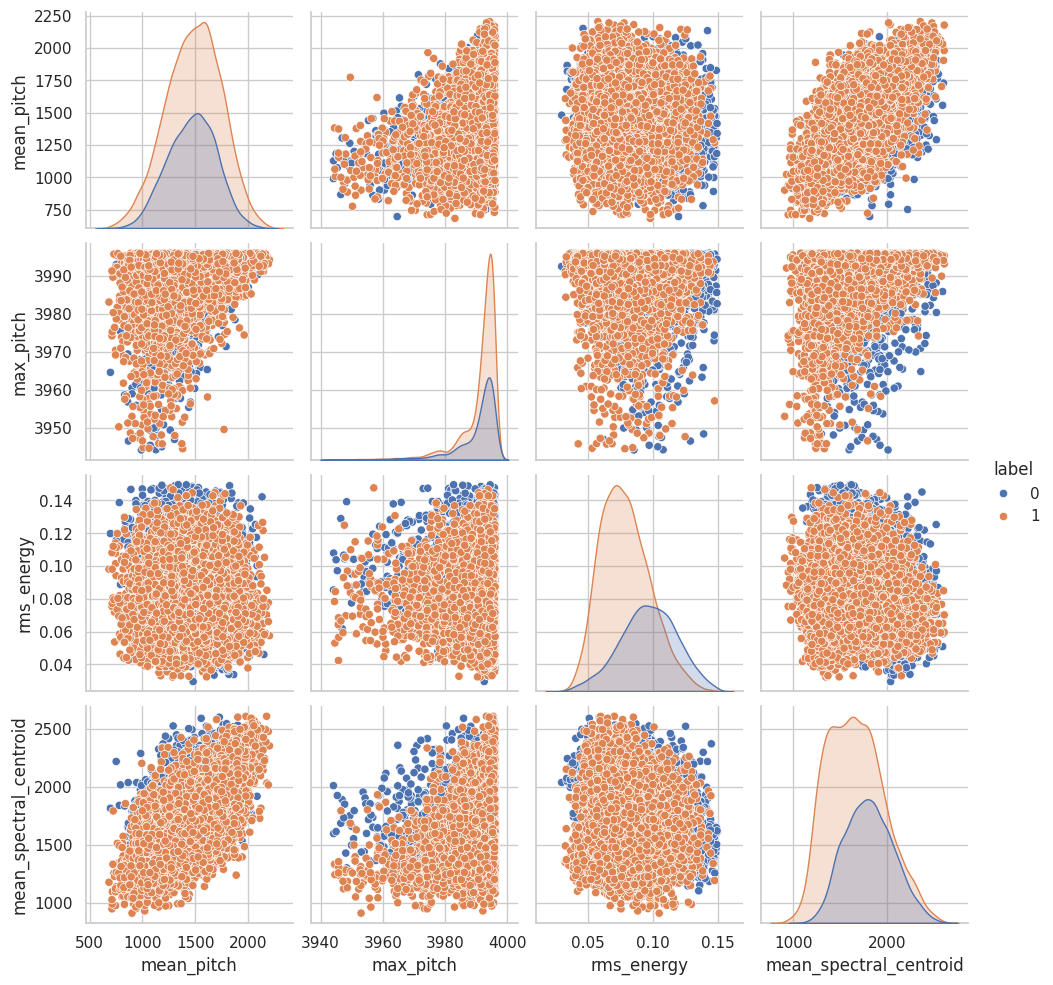

In [ ]:
important_features = ["mean_pitch", "max_pitch", "rms_energy", "mean_spectral_centroid", "label"]

sns.pairplot(df[important_features], hue="label")
plt.show()


#Model Building

####Train Classification Models

####Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

####Support Vector Machine (SVM)

In [ ]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)




SVC(probability=True)

####Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

####K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

####Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)


GradientBoostingClassifier()

##Save Models

In [ ]:
joblib.dump(lr, "models/lr_model.pkl")
joblib.dump(svm, "models/svm_model.pkl")
joblib.dump(rf, "models/rf_model.pkl")
joblib.dump(knn, "models/knn_model.pkl")
joblib.dump(gb, "models/gb_model.pkl")
print("All models saved successfully!")


All models saved successfully!


#Model Evaluation and Comparision
######We evaluate all trained models on the validation set (X_val_scaled).

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



####Evaluate All Models

In [ ]:
models = {
    "Logistic Regression": lr,
    "SVM": svm,
    "Random Forest": rf,
    "KNN": knn,
    "Gradient Boosting": gb
}

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    evaluation_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    }

# Display results
import pandas as pd
df_eval = pd.DataFrame(evaluation_results).T
print(df_eval)


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.994872   0.994103  0.998308  0.996201
SVM                  1.000000   1.000000  1.000000  1.000000
Random Forest        0.992023   0.989933  0.998308  0.994103
KNN                  0.998860   1.000000  0.998308  0.999153
Gradient Boosting    0.993162   0.992424  0.997462  0.994937


####Confusion Matrix for Best Model

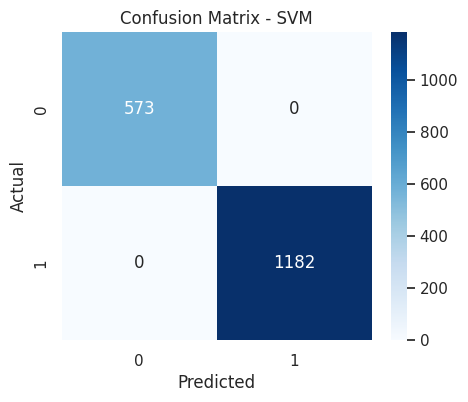

In [ ]:
best_model_name = df_eval['Accuracy'].idxmax()  # pick model with highest accuracy
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_val_scaled)
cm = confusion_matrix(y_val, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


####ROC Curve

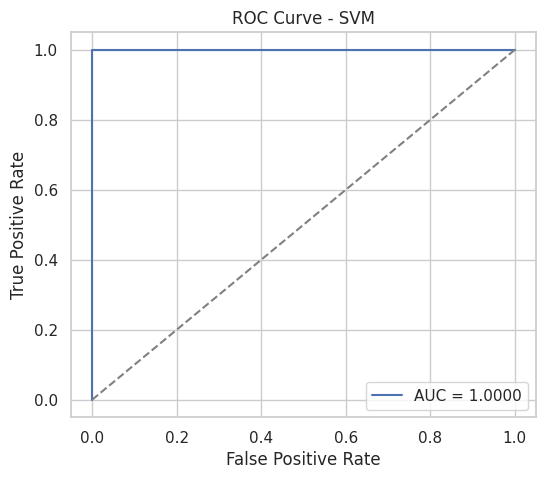

In [ ]:
y_prob = best_model.predict_proba(X_val_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc_score = roc_auc_score(y_val, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name}")
plt.legend()
plt.show()
